# Importing

## Import Library

In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction-dataset/car_price_dataset_medium.csv


## Import CSV And convert to DataFrame

In [2]:
df = pd.read_csv("/kaggle/input/car-price-prediction-dataset/car_price_dataset_medium.csv")

## Frist five row

In [3]:
df.head()

,Car_ID,Brand,Model_Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine_CC,Max_Power_bhp,Mileage_kmpl,Seats,Price_USD
0,1,Audi,2005,197018,Diesel,Manual,First,4046,223.6,29.61,6,119611.94
1,2,BMW,2019,43467,Hybrid,Automatic,First,3731,248.4,21.66,5,90842.46
2,3,Kia,2012,153697,Hybrid,Automatic,Third,4925,465.5,12.14,6,78432.24
3,4,Mercedes,2015,38893,Petrol,Automatic,Second,3771,229.7,19.65,6,44568.89
4,5,Audi,2016,81329,Hybrid,Automatic,First,2817,573.2,7.74,5,8751.82


## last Five row

In [4]:
df.tail()

,Car_ID,Brand,Model_Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine_CC,Max_Power_bhp,Mileage_kmpl,Seats,Price_USD
995,996,Volkswagen,2013,143440,Hybrid,Manual,First,3121,558.9,29.45,4,73873.86
996,997,Volkswagen,2021,90436,Electric,Automatic,Third,1295,437.8,10.01,6,115655.85
997,998,Kia,2015,51403,Electric,Manual,Second,4595,274.6,10.38,2,71968.08
998,999,Honda,2011,96170,Petrol,Manual,Third,2948,329.7,12.30,6,58127.19
999,1000,Nissan,2018,14168,Petrol,Automatic,First,1356,87.2,9.32,7,70087.99


## Shape of our dataset

In [5]:
df.shape

(1000, 12)

## List out all columns

In [6]:
df.columns

Index(['Car_ID', 'Brand', 'Model_Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Engine_CC', 'Max_Power_bhp',
       'Mileage_kmpl', 'Seats', 'Price_USD'],
      dtype='object')

## Datatype of each columns

In [7]:
df.dtypes

Car_ID                 int64
Brand                 object
Model_Year             int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Engine_CC              int64
Max_Power_bhp        float64
Mileage_kmpl         float64
Seats                  int64
Price_USD            float64
dtype: object

### Information of all Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Car_ID             1000 non-null   int64  
 1   Brand              1000 non-null   object 
 2   Model_Year         1000 non-null   int64  
 3   Kilometers_Driven  1000 non-null   int64  
 4   Fuel_Type          1000 non-null   object 
 5   Transmission       1000 non-null   object 
 6   Owner_Type         1000 non-null   object 
 7   Engine_CC          1000 non-null   int64  
 8   Max_Power_bhp      1000 non-null   float64
 9   Mileage_kmpl       1000 non-null   float64
 10  Seats              1000 non-null   int64  
 11  Price_USD          1000 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 93.9+ KB


## Check Null Value

In [9]:
df.isnull().sum()

Car_ID               0
Brand                0
Model_Year           0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Engine_CC            0
Max_Power_bhp        0
Mileage_kmpl         0
Seats                0
Price_USD            0
dtype: int64

## Check Null Value

In [10]:
df.duplicated().sum()

0

# EDA

In [11]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


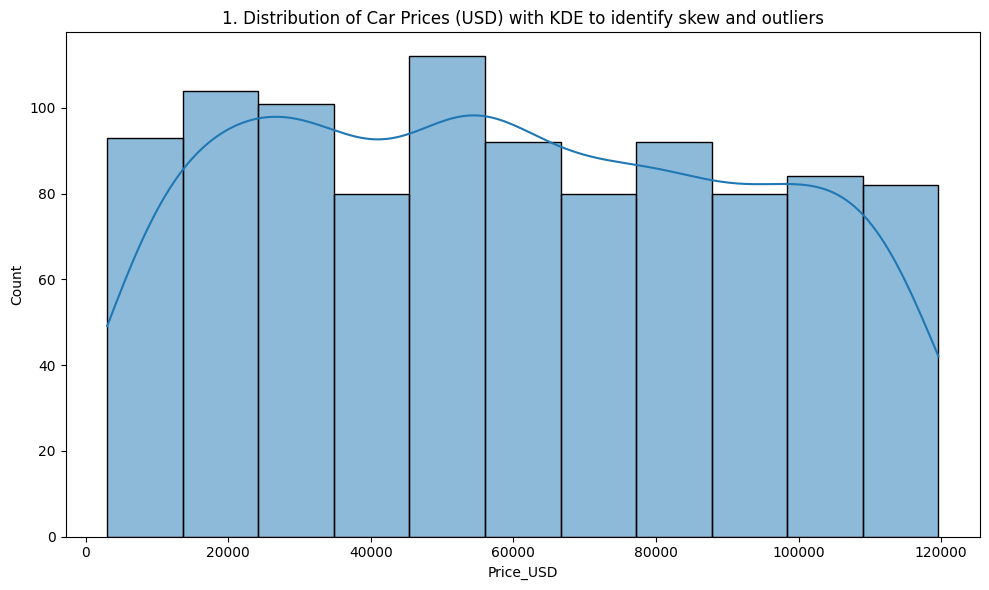

In [12]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['Price_USD'].dropna(), kde=True)
plt.title(f'{plot_no}. Distribution of Car Prices (USD) with KDE to identify skew and outliers')
show_fig()
plot_no += 1

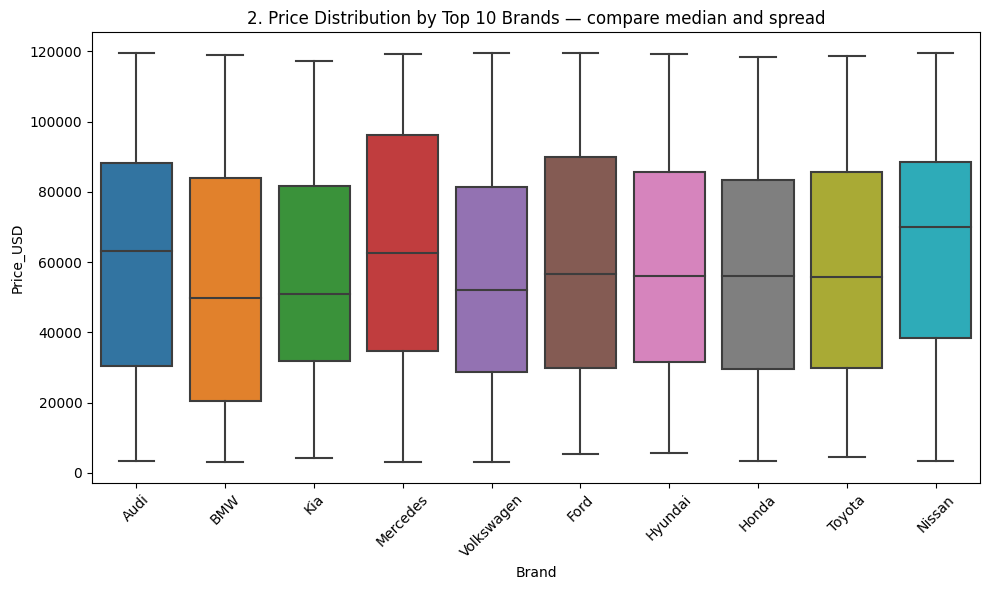

In [13]:
fig = plt.figure(figsize=(10,6))
top_brands = df['Brand'].value_counts().nlargest(10).index
sns.boxplot(data=df[df['Brand'].isin(top_brands)], x='Brand', y='Price_USD')
plt.xticks(rotation=45)
plt.title(f'{plot_no}. Price Distribution by Top 10 Brands — compare median and spread')
show_fig()
plot_no += 1


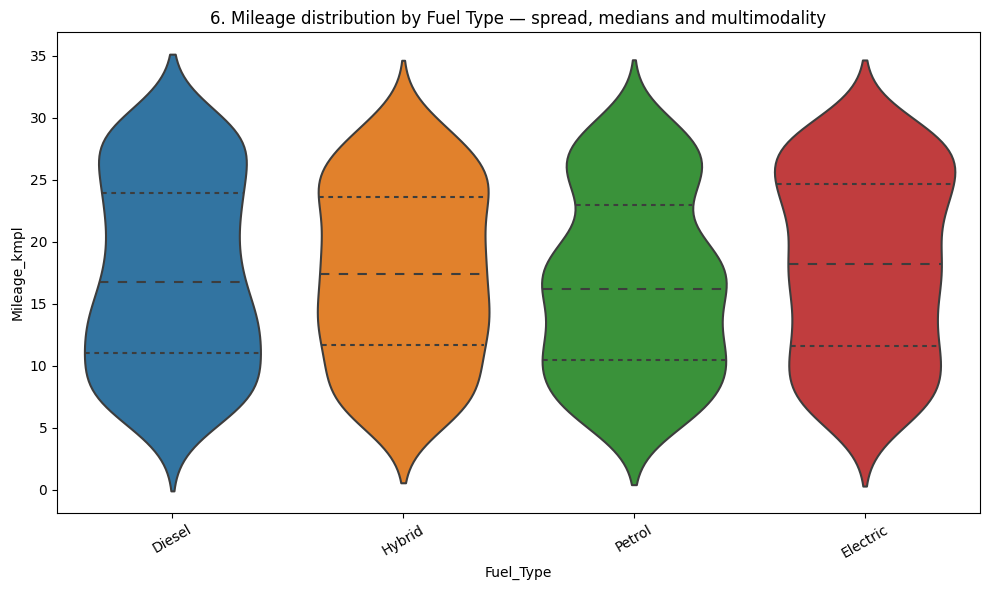

In [17]:
fig = plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='Fuel_Type', y='Mileage_kmpl', inner='quartile')
plt.xticks(rotation=30)
plt.title(f'{plot_no}. Mileage distribution by Fuel Type — spread, medians and multimodality')
show_fig()
plot_no += 1


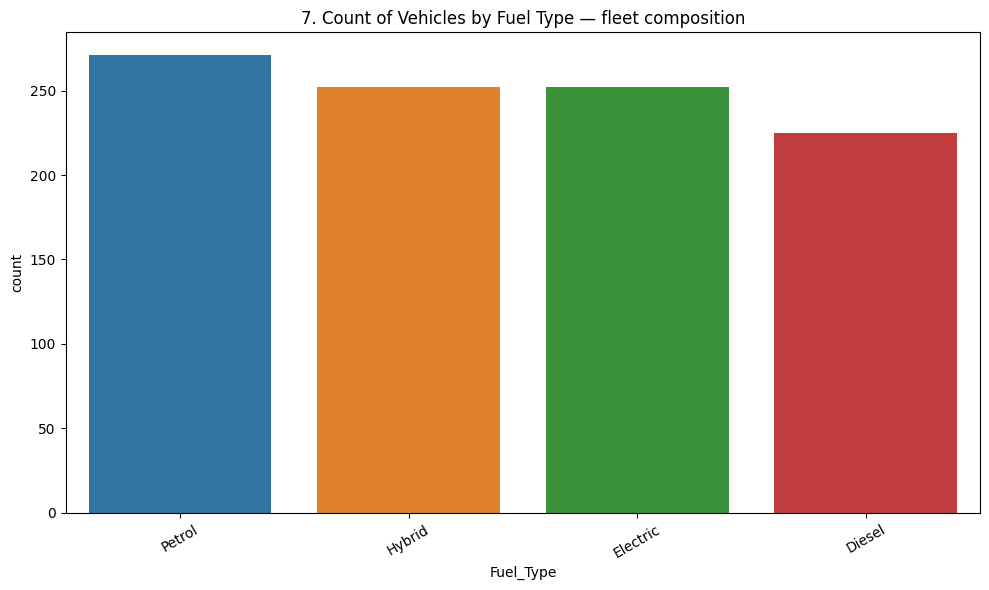

In [18]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Fuel_Type', order=df['Fuel_Type'].value_counts().index)
plt.xticks(rotation=30)
plt.title(f'{plot_no}. Count of Vehicles by Fuel Type — fleet composition')
show_fig()
plot_no += 1


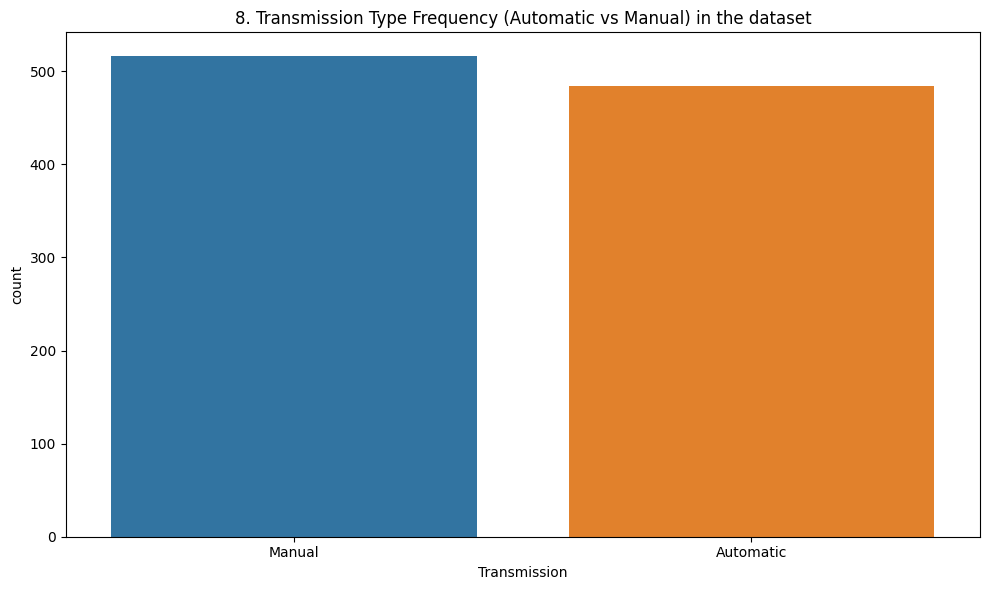

In [19]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Transmission', order=df['Transmission'].value_counts().index)
plt.title(f'{plot_no}. Transmission Type Frequency (Automatic vs Manual) in the dataset')
show_fig()
plot_no += 1


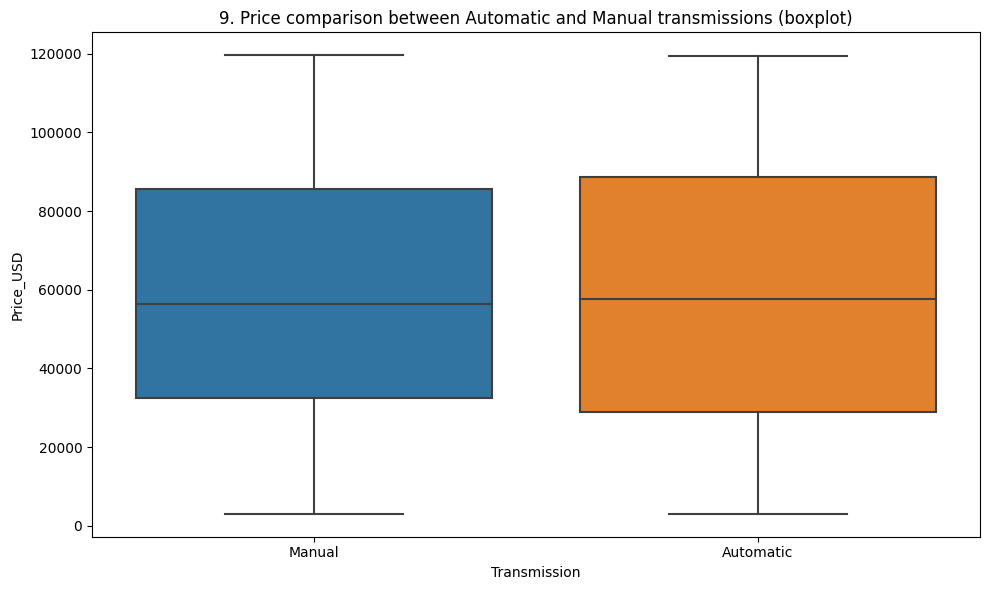

In [20]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Transmission', y='Price_USD')
plt.title(f'{plot_no}. Price comparison between Automatic and Manual transmissions (boxplot)')
show_fig()
plot_no += 1


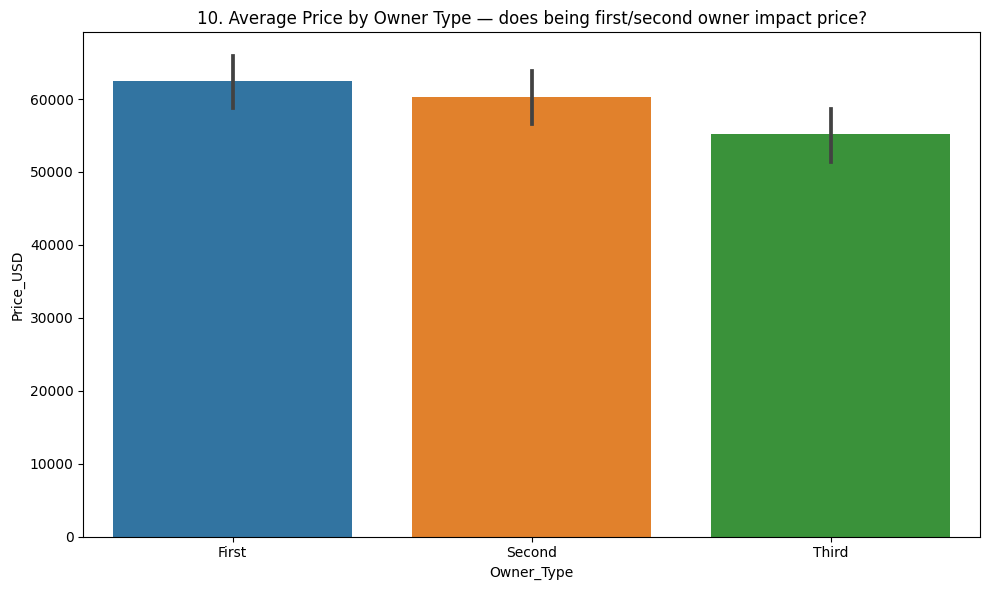

In [21]:
fig = plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Owner_Type', y='Price_USD', estimator='mean', order=df.groupby('Owner_Type')['Price_USD'].mean().sort_values(ascending=False).index)
plt.title(f'{plot_no}. Average Price by Owner Type — does being first/second owner impact price?')
show_fig()
plot_no += 1


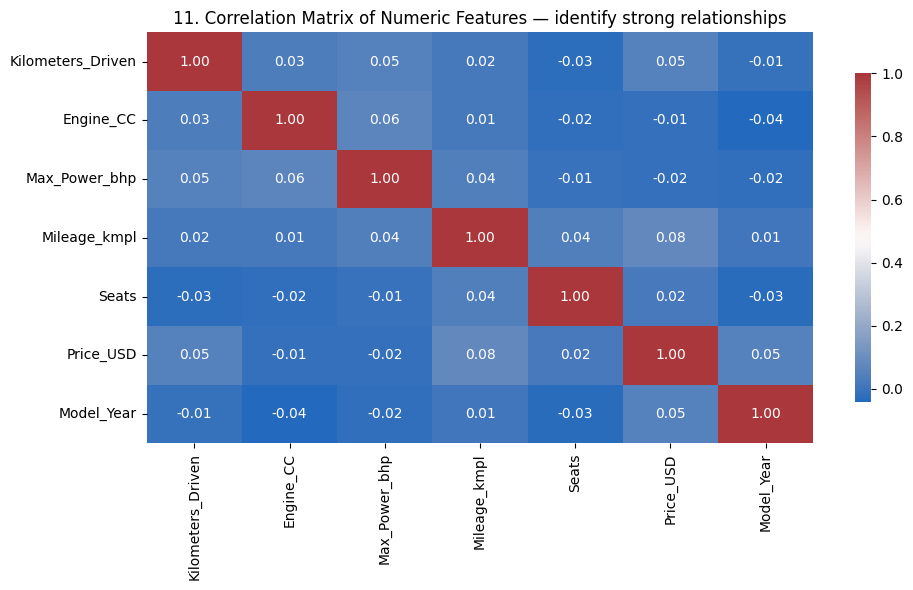

In [22]:
fig = plt.figure(figsize=(10,6))
num_cols = ['Kilometers_Driven','Engine_CC','Max_Power_bhp','Mileage_kmpl','Seats','Price_USD','Model_Year']
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', cbar_kws={'shrink':0.8})
plt.title(f'{plot_no}. Correlation Matrix of Numeric Features — identify strong relationships')
show_fig()
plot_no += 1


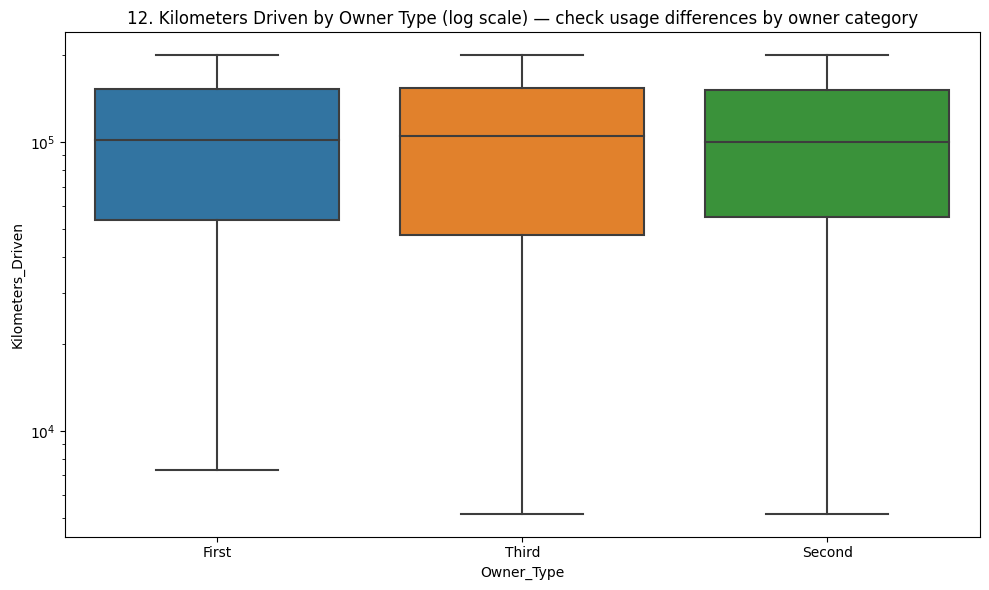

In [23]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Owner_Type', y='Kilometers_Driven')
plt.yscale('log')
plt.title(f'{plot_no}. Kilometers Driven by Owner Type (log scale) — check usage differences by owner category')
show_fig()
plot_no += 1


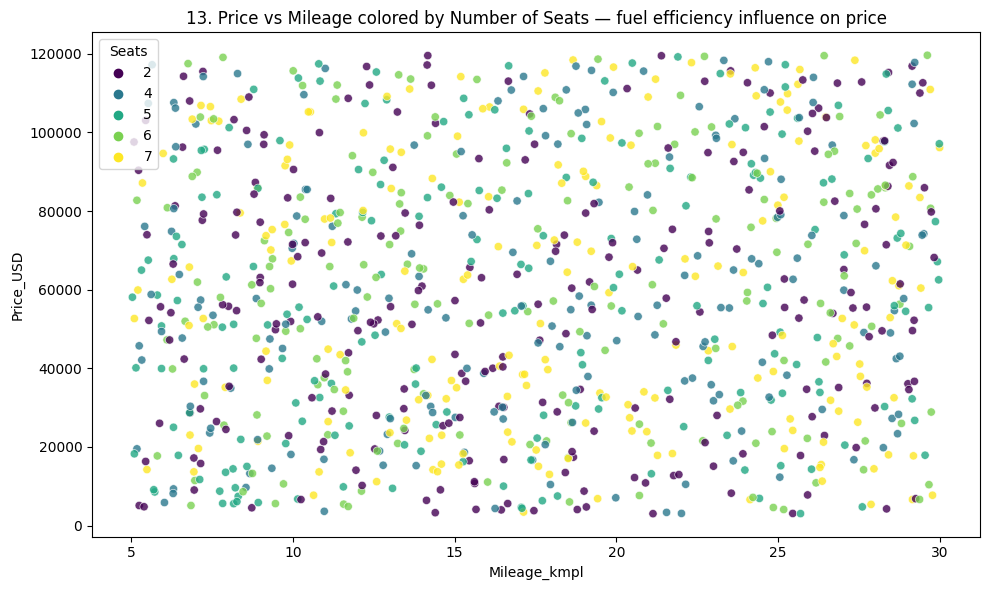

In [24]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Mileage_kmpl', y='Price_USD', hue='Seats', palette='viridis', alpha=0.8)
plt.title(f'{plot_no}. Price vs Mileage colored by Number of Seats — fuel efficiency influence on price')
show_fig()
plot_no += 1


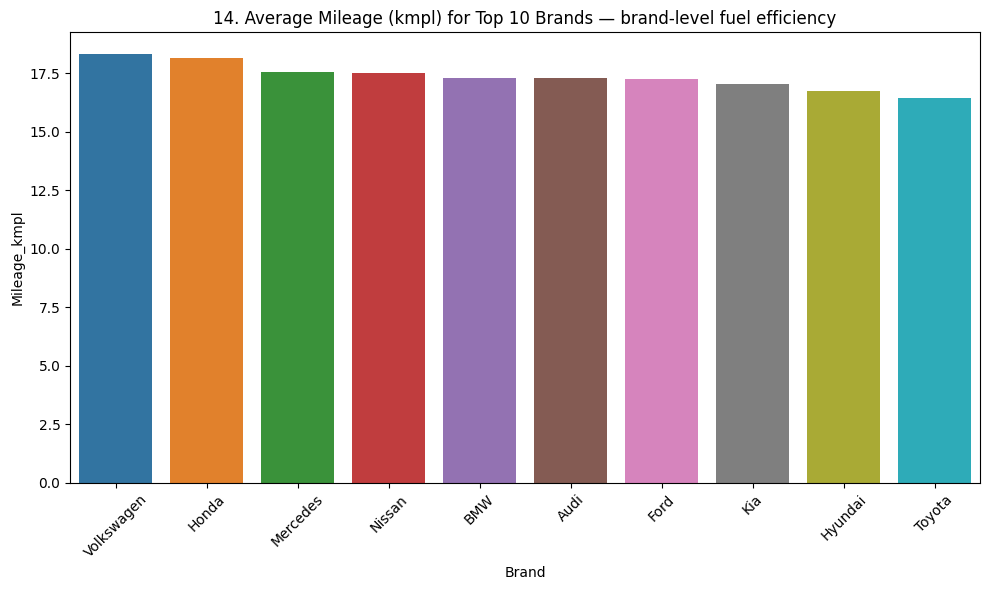

In [25]:
fig = plt.figure(figsize=(10,6))
top_brands = df['Brand'].value_counts().nlargest(10).index
sns.barplot(data=df[df['Brand'].isin(top_brands)].groupby('Brand')['Mileage_kmpl'].mean().reset_index().sort_values('Mileage_kmpl', ascending=False), x='Brand', y='Mileage_kmpl')
plt.xticks(rotation=45)
plt.title(f'{plot_no}. Average Mileage (kmpl) for Top 10 Brands — brand-level fuel efficiency')
show_fig()
plot_no += 1


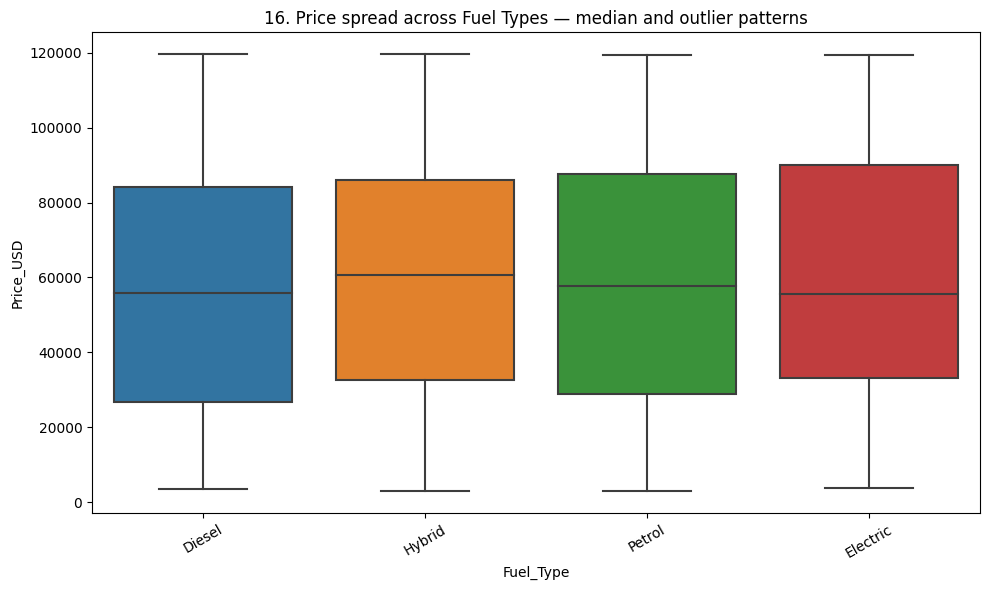

In [27]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Fuel_Type', y='Price_USD')
plt.xticks(rotation=30)
plt.title(f'{plot_no}. Price spread across Fuel Types — median and outlier patterns')
show_fig()
plot_no += 1


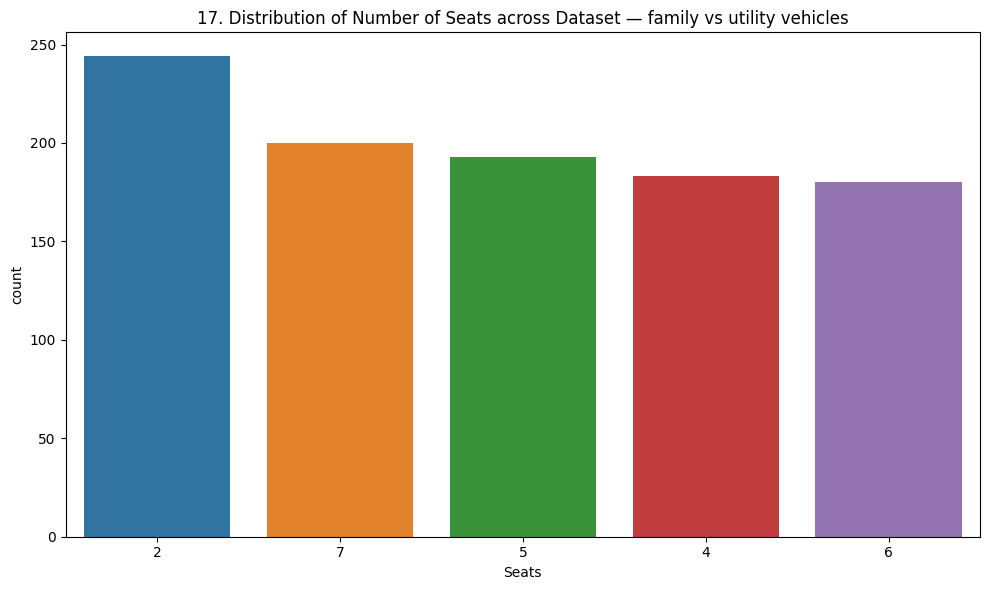

In [28]:
fig = plt.figure(figsize=(10,6))
seat_order = df['Seats'].value_counts().index
sns.countplot(data=df, x='Seats', order=seat_order)
plt.title(f'{plot_no}. Distribution of Number of Seats across Dataset — family vs utility vehicles')
show_fig()
plot_no += 1


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


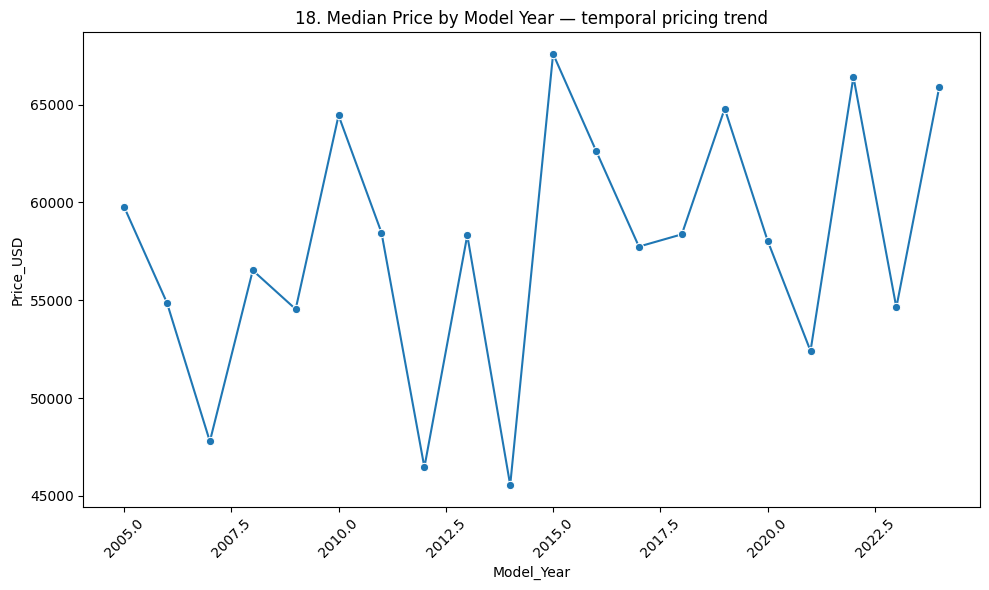

In [29]:
fig = plt.figure(figsize=(10,6))
year_price = df.groupby('Model_Year')['Price_USD'].median().reset_index().sort_values('Model_Year')
sns.lineplot(data=year_price, x='Model_Year', y='Price_USD', marker='o')
plt.xticks(rotation=45)
plt.title(f'{plot_no}. Median Price by Model Year — temporal pricing trend')
show_fig()
plot_no += 1


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

X = df[['Kilometers_Driven', 'Engine_CC', 'Max_Power_bhp', 'Mileage_kmpl', 'Seats', 'Model_Year']]
y = df['Price_USD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

-0.048005233231672495